# Как поймать сталкера?

Всё началось с одного ленивого рабочего дня, когда мне было настолько лень шевелить мозгами, что я залезла в статистику своего профиля ВК и увидела там весьма неожиданное. До четверти всех визитёров моей страницы приходится на один небольшой город к северу от Москвы. Вот, интересно, откуда у его жителей такой интерес к моей скромной персоне? Так как статистическая закономерность не менялась аж полгода, я решила выгрузить полугодовую статистику и посмотреть, кому же я так понадобилась. Сразу скажу, что VK API не дает возможности выгрузить детальную статистику по личной странице, такое можно сделать только для сообществ. Да и для получения входного токена теперь надо предоставить ресурсу чувствительную информацию о себе. Так что, я решила, что буду довольтсвоваться обезличенной информацией о посещаемости моей страницы, которую можно выгрузить безо всякого API в формате Excel.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

data = pd.read_excel('vkontakte_user2532934_2024-01-01_2024-05-27.xls')
data.head(20)

#Выглялит не очень наглядно. Для каждой даты есть ряд критериев и их значений.

,Дата,Критерий,Парам. №1,Парам. №2,Значение
0,27.05.2024,views,NaN,NaN,4
1,27.05.2024,visitors,NaN,NaN,3
2,27.05.2024,gender,Ж,NaN,3
3,27.05.2024,age,30-35,NaN,1
4,27.05.2024,age,35-45,NaN,2
5,27.05.2024,gender_age,Ж,30-35,1
6,27.05.2024,gender_age,Ж,35-45,2
7,27.05.2024,cities,Москва,NaN,2
8,27.05.2024,cities,Лобня,NaN,1
9,27.05.2024,countries,Россия,NaN,2


Для начала я решила очистить данные от лишних критериев, ведь меня интересует, в основном, статистика по городам, полу и возросту посетителей, а также количеству просмотров.

In [2]:
unwanted_criteria = ['countries', 'gender','age','visitors','reach_subscribers','reach_viral','reach','feedback', 'members']

df = data[~data['Критерий'].isin(unwanted_criteria)]
df.head(20)
#Выглядит уже приятнее. Да и некоторая закономерность уже проследивается ;)

,Дата,Критерий,Парам. №1,Парам. №2,Значение
0,27.05.2024,views,NaN,NaN,4
5,27.05.2024,gender_age,Ж,30-35,1
6,27.05.2024,gender_age,Ж,35-45,2
7,27.05.2024,cities,Москва,NaN,2
8,27.05.2024,cities,Лобня,NaN,1
13,26.05.2024,views,NaN,NaN,7
20,26.05.2024,gender_age,Ж,30-35,1
21,26.05.2024,gender_age,Ж,35-45,1
22,26.05.2024,gender_age,М,30-35,1
23,26.05.2024,gender_age,М,45+,1


Теперь я хочу видеть всю информацию в одной графе для каждой даты, для чего делаю сводную таблицу.
Для удобства анализа временного ряда перевожу индексы таблицы во временной формат (вместо строкового). Далее для удобства просмотра сортирую таблицу в хронологическом порядке.

In [3]:
df = df.pivot(index='Дата', columns=['Критерий', 'Парам. №1', 'Парам. №2'], values='Значение')
df.index = pd.to_datetime(df.index, format='%d.%m.%Y')
df= df.sort_index(ascending=True)
df.head(30)

Критерий   views gender_age       cities       gender_age                   \
Парам. №1    NaN          Ж       Москва Лобня          М          Ж     М   
Парам. №2    NaN      30-35 35-45    NaN   NaN      30-35  45+ 27-30 27-30   
Дата                                                                         
2024-01-01   5.0        2.0   NaN    2.0   1.0        NaN  NaN   NaN   1.0   
2024-01-02   8.0        NaN   1.0    4.0   NaN        2.0  NaN   1.0   NaN   
2024-01-03  11.0        1.0   2.0    3.0   1.0        1.0  NaN   NaN   NaN   
2024-01-04  10.0        2.0   1.0    4.0   1.0        NaN  NaN   NaN   NaN   
2024-01-05   5.0        1.0   NaN    2.0   1.0        1.0  NaN   NaN   NaN   
2024-01-06   2.0        NaN   1.0    1.0   NaN        1.0  NaN   NaN   NaN   
2024-01-07   6.0        2.0   1.0    3.0   1.0        1.0  NaN   NaN   NaN   
2024-01-08   8.0        1.0   2.0    4.0   NaN        1.0  NaN   NaN   NaN   
2024-01-09   5.0        1.0   1.0    1.0   1.0        1.0  NaN   1.0   NaN   
2024-01-10   5.0        NaN   2.0    4.0   NaN        NaN  NaN   NaN   NaN   
2024-01-11   3.0        1.0   NaN    1.0   1.0        NaN  NaN   NaN   NaN   
2024-01-12  12.0        3.0   3.0    6.0   NaN        2.0  1.0   NaN   1.0   
2024-01-13   5.0        1.0   1.0    3.0   1.0        1.0  NaN   NaN   NaN   
2024-01-14   5.0        NaN   1.0    3.0   NaN        1.0  1.0   NaN   NaN   
2024-01-15   4.0        1.0   NaN    2.0   1.0        2.0  NaN   NaN   NaN   
2024-01-16   4.0        NaN   1.0    1.0   NaN        1.0  NaN   NaN   NaN   
2024-01-17   8.0        2.0   2.0    5.0   1.0        1.0  NaN   NaN   NaN   
2024-01-18   3.0        NaN   NaN    NaN   NaN        NaN  NaN   NaN   NaN   
2024-01-19   6.0        1.0   NaN    4.0   1.0        NaN  NaN   NaN   NaN   
2024-01-20   7.0        1.0   2.0    4.0   NaN        2.0  NaN   NaN   1.0   
2024-01-21   6.0        1.0   1.0    3.0   1.0        1.0  NaN   1.0   NaN   
2024-01-22  25.0        5.0   8.0   17.0   NaN        1.0  NaN   NaN   2.0   
2024-01-23  18.0        1.0   1.0    7.0   NaN        3.0  1.0   1.0   NaN   
2024-01-24  31.0        5.0   8.0   21.0   1.0        1.0  NaN   NaN   1.0   
2024-01-25  17.0        NaN   3.0    9.0   NaN        2.0  2.0   NaN   1.0   
2024-01-26   6.0        2.0   2.0    3.0   1.0        1.0  NaN   NaN   NaN   
2024-01-27   9.0        NaN   NaN    3.0   NaN        1.0  NaN   NaN   NaN   
2024-01-28   8.0        1.0   3.0    4.0   1.0        1.0  NaN   NaN   NaN   
2024-01-29   7.0        1.0   NaN    3.0   NaN        NaN  NaN   NaN   1.0   
2024-01-30   8.0        NaN   1.0    3.0   NaN        1.0  NaN   NaN   NaN   

Критерий     cities  ...                                                   \
Парам. №1  Кострома  ... Королёв Ankara Балашиха Ульяновск Реутов Фрязино   
Парам. №2       NaN  ...     NaN    NaN      NaN       NaN    NaN     NaN   
Дата                 ...                                                    
2024-01-01      NaN  ...     NaN    NaN      NaN       NaN    NaN     NaN   
2024-01-02      NaN  ...     NaN    NaN      NaN       NaN    NaN     NaN   
2024-01-03      NaN  ...     NaN    NaN      NaN       NaN    NaN     NaN   
2024-01-04      NaN  ...     NaN    NaN      NaN       NaN    NaN     NaN   
2024-01-05      NaN  ...     NaN    NaN      NaN       NaN    NaN     NaN   
2024-01-06      NaN  ...     NaN    NaN      NaN       NaN    NaN     NaN   
2024-01-07      NaN  ...     NaN    NaN      NaN       NaN    NaN     NaN   
2024-01-08      NaN  ...     NaN    NaN      NaN       NaN    NaN     NaN   
2024-01-09      NaN  ...     NaN    NaN      NaN       NaN    NaN     NaN   
2024-01-10      NaN  ...     NaN    NaN      NaN       NaN    NaN     NaN   
2024-01-11      NaN  ...     NaN    NaN      NaN       NaN    NaN     NaN   
2024-01-12      NaN  ...     NaN    NaN      NaN       1.0    NaN     NaN   
2024-01-13      NaN  ...     NaN    NaN      NaN       NaN    NaN     NaN   
2024-01-14      NaN  ...     NaN    Na

Теперь можно построить временные ряды посещаемости моей страницы.

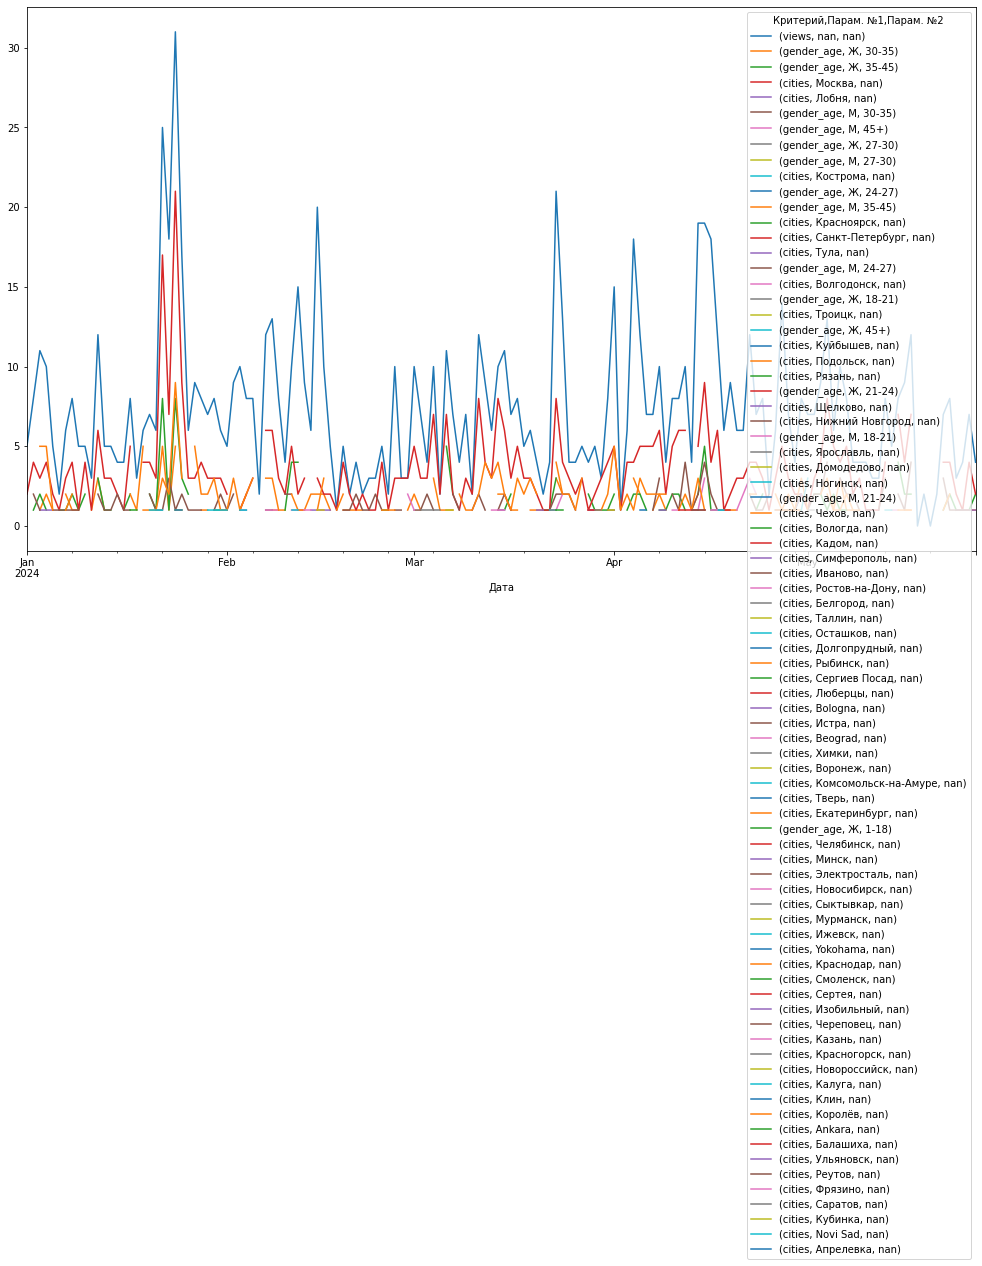

In [4]:
df.plot(figsize=(17, 10))
plt.show()

Пока понятно только то, что тренда посещаемости моей страницы нет. Распределение похоже на белый шум и соотносится только с моей публикационной активностью (по тому, что я транслирую, в основном, белый шум)))
Больше всего просмотров из Москвы, что логично, ведь большинство моих друзей из Москвы.
Но, география посетителей при этом весьма разнообразна. 
Попробую оставить в таблице только те колонки, сумма визитов в которых больше 10.

In [5]:
filtred_df = df.loc[:, df.sum() > 10]
filtred_df

Критерий   views gender_age       cities       gender_age                   \
Парам. №1    NaN          Ж       Москва Лобня          М          Ж     М   
Парам. №2    NaN      30-35 35-45    NaN   NaN      30-35  45+ 27-30 27-30   
Дата                                                                         
2024-01-01   5.0        2.0   NaN    2.0   1.0        NaN  NaN   NaN   1.0   
2024-01-02   8.0        NaN   1.0    4.0   NaN        2.0  NaN   1.0   NaN   
2024-01-03  11.0        1.0   2.0    3.0   1.0        1.0  NaN   NaN   NaN   
2024-01-04  10.0        2.0   1.0    4.0   1.0        NaN  NaN   NaN   NaN   
2024-01-05   5.0        1.0   NaN    2.0   1.0        1.0  NaN   NaN   NaN   
...          ...        ...   ...    ...   ...        ...  ...   ...   ...   
2024-05-23   8.0        NaN   2.0    4.0   NaN        1.0  1.0   NaN   NaN   
2024-05-24   3.0        1.0   1.0    2.0   1.0        1.0  NaN   NaN   NaN   
2024-05-25   4.0        1.0   NaN    1.0   1.0        1.0  NaN   1.0   1.0   
2024-05-26   7.0        1.0   1.0    4.0   1.0        1.0  1.0   NaN   NaN   
2024-05-27   4.0        1.0   2.0    2.0   1.0        NaN  NaN   NaN   NaN   

Критерий                        cities gender_age                        
Парам. №1      Ж     М Санкт-Петербург          М     Ж               М  
Парам. №2  24-27 35-45             NaN      24-27 18-21 45+ 21-24 21-24  
Дата                                                                     
2024-01-01   NaN   1.0             NaN        NaN   NaN NaN   NaN   NaN  
2024-01-02   NaN   NaN             NaN        NaN   NaN NaN   NaN   NaN  
2024-01-03   NaN   5.0             NaN        NaN   NaN NaN   NaN   NaN  
2024-01-04   NaN   5.0             1.0        NaN   NaN NaN   NaN   NaN  
2024-01-05   NaN   1.0             NaN        NaN   NaN NaN   NaN   NaN  
...          ...   ...             ...        ...   ...  ..   ...   ...  
2024-05-23   1.0   2.0             NaN        NaN   NaN NaN   NaN   NaN  
2024-05-24   NaN   NaN             NaN        NaN   NaN NaN   NaN   NaN  
2024-05-25   NaN   NaN             NaN        NaN   NaN NaN   NaN   NaN  
2024-05-26   NaN   NaN             NaN        NaN   NaN NaN   NaN   NaN  
2024-05-27   NaN   NaN             NaN        NaN   NaN NaN   NaN   NaN  

[148 rows x 17 columns]

Уже интереснее. Что же я вижу? За полгода больше всего посетителей было всего лишь из трёх городов: Москвы, Лобни и Перербурга. Да, маленькая Лобня на втором месте, посещения из этого милого города происходили примерно через день.

In [6]:
filtred_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 148 entries, 2024-01-01 to 2024-05-27
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   (views, nan, nan)               148 non-null    float64
 1   (gender_age, Ж, 30-35)          99 non-null     float64
 2   (gender_age, Ж, 35-45)          94 non-null     float64
 3   (cities, Москва, nan)           139 non-null    float64
 4   (cities, Лобня, nan)            72 non-null     float64
 5   (gender_age, М, 30-35)          100 non-null    float64
 6   (gender_age, М, 45+)            42 non-null     float64
 7   (gender_age, Ж, 27-30)          28 non-null     float64
 8   (gender_age, М, 27-30)          14 non-null     float64
 9   (gender_age, Ж, 24-27)          13 non-null     float64
 10  (gender_age, М, 35-45)          99 non-null     float64
 11  (cities, Санкт-Петербург, nan)  28 non-null     float64
 12  (gender_age, М, 2

Теперь я хочу отдельно отследить статистику по дням и низкой публикационной активностью и посещаемостью. Ведь сталкера выдаёт паттерн регулярного посещения моей страницы, а не только тогда, когда я публикую посты.

In [7]:
# Для начала заменю пустые значения (NaN) на нули
filtred_df=filtred_df.fillna(0) 

# Низкой посещаемостью я буду считать посещаемость ниже медианной: 
med = filtred_df[('views', np.nan, np.nan)].median()

In [8]:
lov_visits= filtred_df.loc[filtred_df[('views', np.nan, np.nan)] <= med]
lov_visits

Критерий   views gender_age       cities       gender_age                   \
Парам. №1    NaN          Ж       Москва Лобня          М          Ж     М   
Парам. №2    NaN      30-35 35-45    NaN   NaN      30-35  45+ 27-30 27-30   
Дата                                                                         
2024-01-01   5.0        2.0   0.0    2.0   1.0        0.0  0.0   0.0   1.0   
2024-01-05   5.0        1.0   0.0    2.0   1.0        1.0  0.0   0.0   0.0   
2024-01-06   2.0        0.0   1.0    1.0   0.0        1.0  0.0   0.0   0.0   
2024-01-07   6.0        2.0   1.0    3.0   1.0        1.0  0.0   0.0   0.0   
2024-01-09   5.0        1.0   1.0    1.0   1.0        1.0  0.0   1.0   0.0   
...          ...        ...   ...    ...   ...        ...  ...   ...   ...   
2024-05-22   7.0        0.0   1.0    4.0   0.0        3.0  0.0   0.0   1.0   
2024-05-24   3.0        1.0   1.0    2.0   1.0        1.0  0.0   0.0   0.0   
2024-05-25   4.0        1.0   0.0    1.0   1.0        1.0  0.0   1.0   1.0   
2024-05-26   7.0        1.0   1.0    4.0   1.0        1.0  1.0   0.0   0.0   
2024-05-27   4.0        1.0   2.0    2.0   1.0        0.0  0.0   0.0   0.0   

Критерий                        cities gender_age                         
Парам. №1      Ж     М Санкт-Петербург          М     Ж                М  
Парам. №2  24-27 35-45             NaN      24-27 18-21  45+ 21-24 21-24  
Дата                                                                      
2024-01-01   0.0   1.0             0.0        0.0   0.0  0.0   0.0   0.0  
2024-01-05   0.0   1.0             0.0        0.0   0.0  0.0   0.0   0.0  
2024-01-06   0.0   0.0             0.0        0.0   0.0  0.0   0.0   0.0  
2024-01-07   0.0   1.0             0.0        0.0   0.0  0.0   0.0   0.0  
2024-01-09   0.0   0.0             1.0        0.0   0.0  0.0   0.0   0.0  
...          ...   ...             ...        ...   ...  ...   ...   ...  
2024-05-22   0.0   1.0             1.0        0.0   0.0  0.0   0.0   0.0  
2024-05-24   0.0   0.0             0.0        0.0   0.0  0.0   0.0   0.0  
2024-05-25   0.0   0.0             0.0        0.0   0.0  0.0   0.0   0.0  
2024-05-26   0.0   0.0             0.0        0.0   0.0  0.0   0.0   0.0  
2024-05-27   0.0   0.0             0.0        0.0   0.0  0.0   0.0   0.0  

[86 rows x 17 columns]

Теперь сбросим в обоих фреймах строку с общим числом просмотров. Просто, чтобы она не загромождала будущие матрицы корреляции.

In [9]:
filtred_df = filtred_df.drop(columns=[(('views', np.nan, np.nan) )])
lov_visits = lov_visits.drop(columns=[(('views', np.nan, np.nan) )])

<AxesSubplot:xlabel='Критерий-Парам. №1-Парам. №2', ylabel='Критерий-Парам. №1-Парам. №2'>

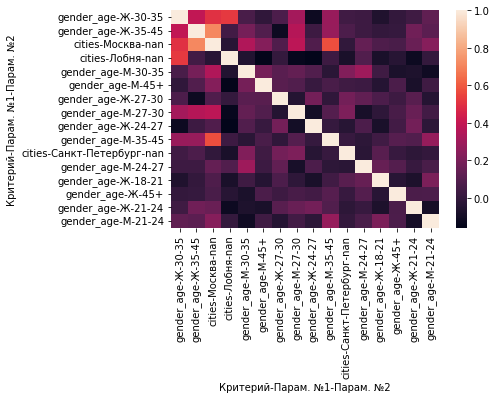

In [10]:
corr_matrix_all = filtred_df.corr()
sn.heatmap(corr_matrix_all)

По общему количеству посещений моей страницы видно, что меня смотрят, в основном, из Москвы и, в основном женщины (0.71) и мужчины (0.57) моей возрастной категории. Однако третье по величине значение в матрице - корреляция между визитами из Лобни и визитами женщин 30-35 лет. Посмотрим, как эта закономерность проявится в матрице с низкими количествами посещений.

<AxesSubplot:xlabel='Критерий-Парам. №1-Парам. №2', ylabel='Критерий-Парам. №1-Парам. №2'>

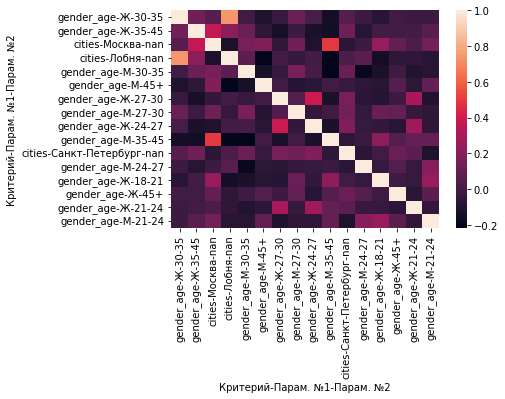

In [11]:
corr_matrix_lov = lov_visits.corr()
sn.heatmap(corr_matrix_lov)

Опа! Здесь КК составляет аж 0.82, гораздо выше, чем между визитами из Москвы и моей возрастной категорией. Друзья обо мне вспоминают и то реже. Так часто думать о моей скромной персоне могут, разве что, враги ;)) И что-то мне подсказывает, что это не про профессиональную конкуренцию.

Ну и на закусочку: посмотрим временной ряд посещений из Лобни.

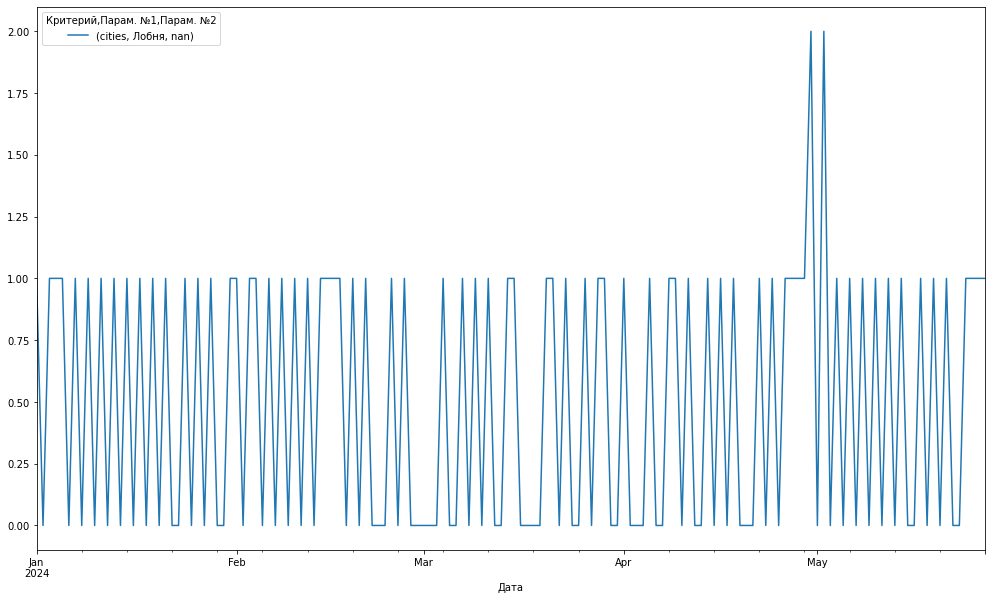

In [12]:
list(filtred_df.columns)
filtred_df[[('cities', 'Лобня', np.nan)]].plot(figsize=(17, 10))
plt.show()

Выглядит так, как будто у моего старкера, точнее сталкерки график 1/1 или 2/2 ))
Штош. Этой информации вполне достаточно для деанона. Дорогая, я всё вижу ;)